In [1]:
import pandas as pd
import numpy as np

In [3]:
df_raw = pd.read_csv('Data/SEER_Raw_Data.csv')

In [4]:
df = df_raw.copy()

In [5]:
# Define the codes to include
codes_to_include = ['8010', '8012', '8013', '8020', '8046', '8050', 
                    '8051', '8052', '8070', '8071', '8072', '8073',
                      '8074', '8075', '8076', '8077', '8078', '8140',
                        '8141', '8143', '8147', '8250', '8251', '8252',
                          '8253', '8254', '8255', '8260', '8310', '8430',
                            '8480', '8481', '8490', '8560', '8570', '8571',
                              '8572', '8573', '8574', '8575', '8002', '8041', '8042', '8043', '8044', '8045']

# Filter the DataFrame
df_filtered = df[df['ICD-O-3 Hist/behav'].astype(str).str[:4].isin(codes_to_include)].copy()

In [6]:
# Define the mapping of codes to groups
sclc_codes = ['8002', '8041', '8042', '8043', '8044']
csclc_code = '8045'

# Function to categorize each row
def categorize(row):
    code = row['ICD-O-3 Hist/behav']
    if str(code).startswith(tuple(sclc_codes)):
        return 'SCLC'
    elif str(code).startswith(csclc_code):
        return 'CSCLC'
    else:
        return 'NSCLC'

# Apply the function
df_filtered['Lung Cancer Group'] = df_filtered.apply(categorize, axis=1)

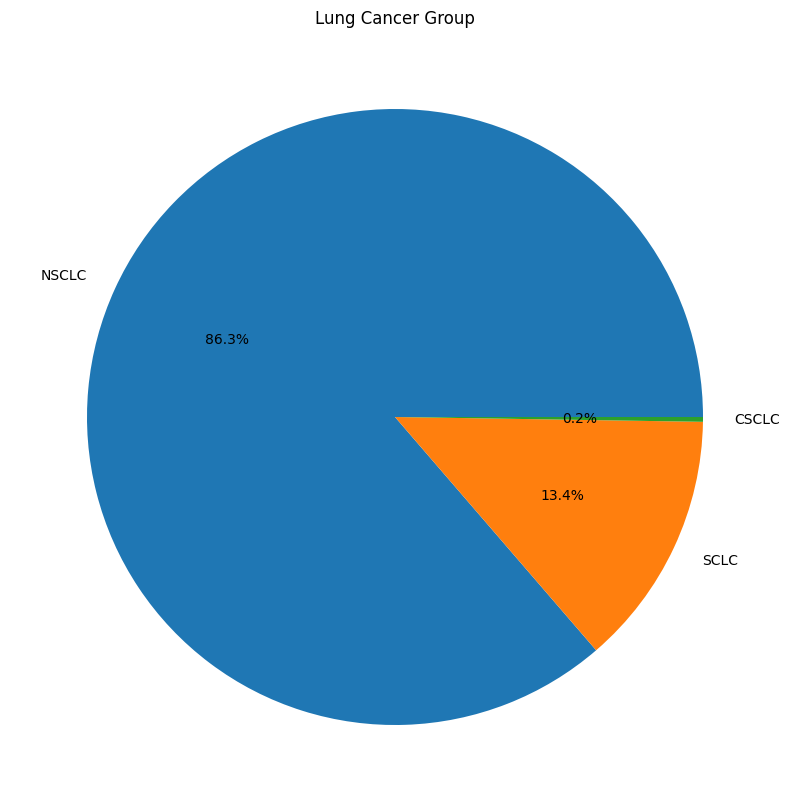

In [7]:
# use piechart and show the percentage of each group
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.pie(df_filtered['Lung Cancer Group'].value_counts(), labels=df_filtered['Lung Cancer Group'].value_counts().index, autopct='%1.1f%%')
plt.title('Lung Cancer Group')
plt.show()

In [8]:
df_filtered['Lung Cancer Group'].value_counts(dropna=False)

Lung Cancer Group
NSCLC    758298
SCLC     117934
CSCLC      2194
Name: count, dtype: int64